In [85]:
import py21cmfast as p21c
from py21cmfast import plotting
import os
import matplotlib.pyplot as plt
from py21cmfast import cache_tools
import numpy as np
import cv2

print(f"21cmFAST version is {p21c.__version__}")

21cmFAST version is 3.3.1


In [86]:
def clear_cache():
    cache_tools.clear_cache(direc="_cache")

#clear_cache()

In [87]:
box_len = 2000#500

In [88]:


lightcone = p21c.run_lightcone(
    redshift = 6.0, #8.0
    max_redshift = 15.0, #13.0
    astro_params = p21c.AstroParams({"HII_EFF_FACTOR":60.0}),
    user_params = {"HII_DIM":150, "BOX_LEN": box_len},
    lightcone_quantities=("brightness_temp", 'density'),
    global_quantities=("brightness_temp", 'density', 'xH_box'),
    direc='_cache'
)

/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/inputs.py:491: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remov

(<Figure size 281x475 with 2 Axes>,
 <Axes: xlabel='Redshift', ylabel='y-axis [Mpc]'>)

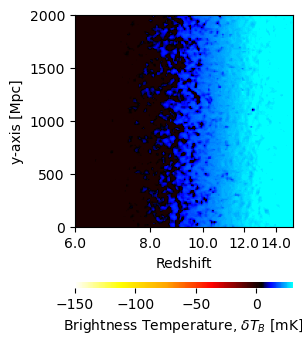

In [89]:
plotting.lightcone_sliceplot(lightcone)

In [90]:
np.shape(lightcone)

(150, 150, 154)

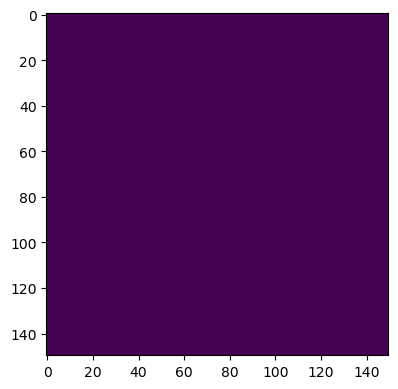

(150, 150)


In [91]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(111)
img1 = getattr(lightcone, 'brightness_temp')[:,:,0]
ax1.imshow(img1)


plt.tight_layout()
plt.show()

print(np.shape(img1))

# Comoving distance

In [92]:
dir(lightcone)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_prefix',
 '_input_rep',
 '_particular_rep',
 '_read_inputs',
 '_read_particular',
 '_write',
 '_write_particulars',
 'astro_params',
 'brightness_temp',
 'cache_files',
 'cell_size',
 'cosmo_params',
 'density',
 'flag_options',
 'gather',
 'get_cached_data',
 'get_unique_filename',
 'global_brightness_temp',
 'global_density',
 'global_params',
 'global_quantities',
 'global_xH',
 'global_xHI',
 'lightcone_coords',
 'lightcone_dimensions',
 'lightcone_distances',
 'lightcone_redshifts',
 'lightcones',
 'log10_mturnovers',
 'log10_mturnovers_mini',
 'n_slices',
 'node_redshifts',
 'photon_nonconserv

In [93]:
distances = getattr(lightcone, 'lightcone_distances')
redshifts = getattr(lightcone, 'lightcone_redshifts')

In [94]:
len(redshifts)

154

In [95]:
distances

array([ 8425.27108195,  8438.69156126,  8452.11204056,  8465.53251986,
        8478.95299917,  8492.37347847,  8505.79395777,  8519.21443707,
        8532.63491638,  8546.05539568,  8559.47587498,  8572.89635429,
        8586.31683359,  8599.73731289,  8613.15779219,  8626.5782715 ,
        8639.9987508 ,  8653.4192301 ,  8666.83970941,  8680.26018871,
        8693.68066801,  8707.10114731,  8720.52162662,  8733.94210592,
        8747.36258522,  8760.78306453,  8774.20354383,  8787.62402313,
        8801.04450243,  8814.46498174,  8827.88546104,  8841.30594034,
        8854.72641965,  8868.14689895,  8881.56737825,  8894.98785755,
        8908.40833686,  8921.82881616,  8935.24929546,  8948.66977477,
        8962.09025407,  8975.51073337,  8988.93121267,  9002.35169198,
        9015.77217128,  9029.19265058,  9042.61312989,  9056.03360919,
        9069.45408849,  9082.87456779,  9096.2950471 ,  9109.7155264 ,
        9123.1360057 ,  9136.556485  ,  9149.97696431,  9163.39744361,
      

In [96]:
redshifts

array([ 6.00000003,  6.03151986,  6.06325194,  6.09519799,  6.12736008,
        6.15974023,  6.19234023,  6.22516225,  6.25820829,  6.29148034,
        6.3249806 ,  6.35871102,  6.39267389,  6.42687125,  6.46130537,
        6.49597833,  6.53089242,  6.56604997,  6.60145316,  6.63710431,
        6.67300577,  6.70915991,  6.74556908,  6.78223582,  6.8191624 ,
        6.85635146,  6.8938054 ,  6.93152672,  6.96951815,  7.0077822 ,
        7.0463214 ,  7.08513856,  7.12423627,  7.16361734,  7.2032844 ,
        7.24324043,  7.28348807,  7.32403026,  7.3648699 ,  7.40600987,
        7.44745323,  7.4892029 ,  7.53126192,  7.57363338,  7.61632048,
        7.6593263 ,  7.70265399,  7.74630689,  7.79028813,  7.83460125,
        7.87924931,  7.92423605,  7.96956459,  8.01523863,  8.06126165,
        8.10763723,  8.15436895,  8.20146054,  8.24891562,  8.29673805,
        8.34493169,  8.39350027,  8.44244772,  8.49177818,  8.5414954 ,
        8.59160373,  8.642107  ,  8.69300964,  8.74431584,  8.79

In [97]:
np.shape(redshifts) == np.shape(distances)

True

In [98]:
theta = np.arctan(1000/np.max(distances))
angle = 2 * (theta*180/np.pi) # check if looks sensible
angle

10.902746887765867

In [99]:
img_zmax = getattr(lightcone,'brightness_temp')[:,:,-1]

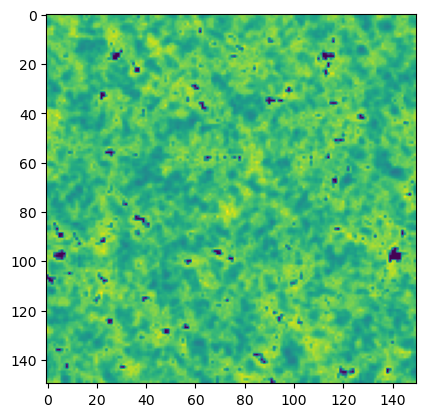

In [55]:
plt.imshow(img_zmax)

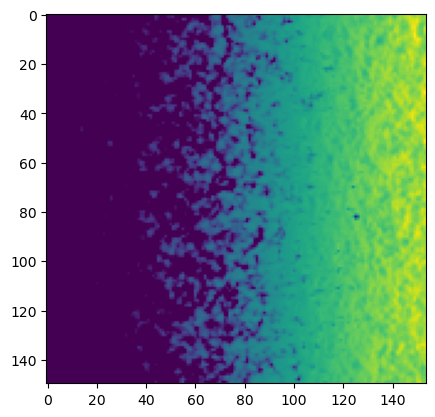

In [100]:
img_profile = getattr(lightcone,'brightness_temp')[0,:,:]
plt.imshow(img_profile)


In [101]:
rgb_shape = list(np.shape(img_profile))
rgb_shape.append(3)

rgb_img = np.zeros(rgb_shape)
rgb_img[:,:,-1] = img_profile
rgb_img = rgb_img/np.max(rgb_img)

In [102]:
np.max(rgb_img)

1.0

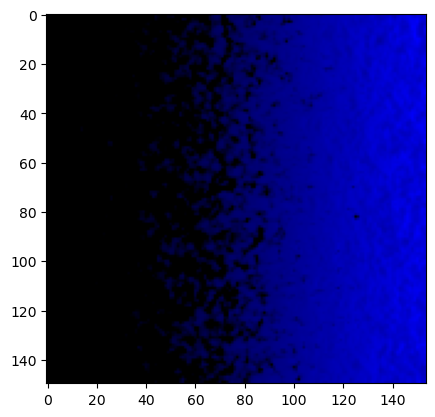

In [103]:
plt.imshow(rgb_img)

In [104]:
dist_max = np.max(distances)

theta = np.arctan((box_len/2)/dist_max)

test = np.copy(rgb_img)

for i in range(len(distances)):

    dist = distances[len(distances)-1-i]
    half_box_mpc = np.tan(theta)*dist
    half_box_pixels = int(((np.shape(img_profile)[0]/2)/(np.tan(theta)*dist_max))*half_box_mpc)
    
    pixels_from_edge = int(np.shape(img_profile)[0]/2-half_box_pixels)
    
    test[pixels_from_edge, len(distances)-1-i, -1] = 0 
    test[pixels_from_edge, len(distances)-1-i, 0] = 1.0 

    test[-pixels_from_edge, len(distances)-1-i, -1] = 0 
    test[-pixels_from_edge, len(distances)-1-i, 0] = 1.0 


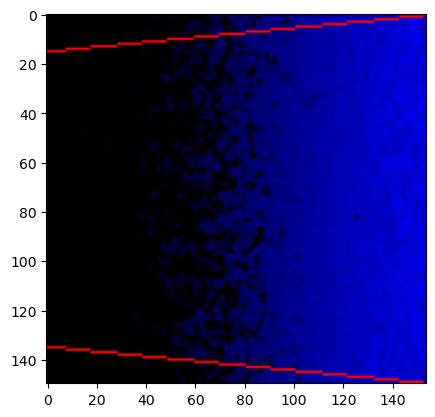

In [105]:
plt.imshow(test)

In [106]:
dist_max = np.max(distances)

theta = np.arctan((box_len/2)/dist_max)

simulation = getattr(lightcone,'brightness_temp')
img_zmax = simulation[:,:,-1]

frames = []

for i in range(len(distances)):

    dist = distances[len(distances)-1-i]
    half_box_mpc = np.tan(theta)*dist
    half_box_pixels = int(((np.shape(img_profile)[0]/2)/(np.tan(theta)*dist_max))*half_box_mpc)
    
    pixels_from_edge = int(np.shape(img_profile)[0]/2-half_box_pixels)
    
    if i==0:
        frame = np.copy(simulation[:,:,np.shape(img_profile)[1]-1-i])
    else:
        frame = np.copy(simulation[pixels_from_edge:-pixels_from_edge,
                                   pixels_from_edge:-pixels_from_edge,
                                   np.shape(img_profile)[1]-1-i])
        
        frame = cv2.resize(frame, (150, 150), interpolation=cv2.INTER_NEAREST)
        
    
    print(np.shape(frame))
    frames.append(frame)

(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)

In [107]:
len(frames) == np.shape(simulation[:,0,:])[1]

True

Text(0.5, 1.0, 'simulation')

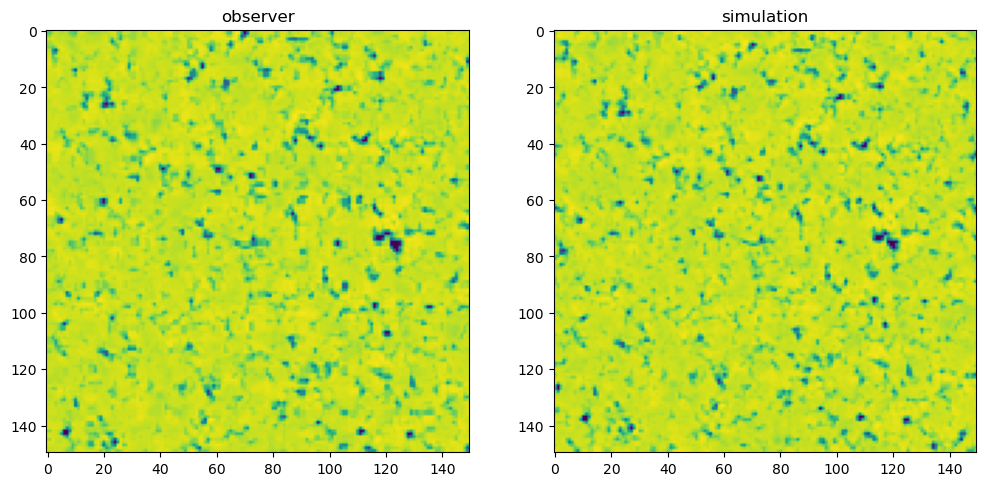

In [120]:
idx = 50

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(frames[idx])
#plt.xlabel('{}'.format(np.shape(frames[-1])))
plt.title('observer')
plt.subplot(122)
plt.imshow(simulation[:,:,-idx-1])
#plt.xlabel('{}'.format(np.shape(simulation[:,:,0])))
plt.title('simulation')



In [109]:
'''i = 0
 
while True:
    i += 1
    if i >= len(frames):
        i=0
    


    frame = np.stack([frames[i],
                      np.zeros(np.shape(frames[i])),
                      np.zeros(np.shape(frames[i]))],axis=-1)
    cv2.waitKey(50)
    

    cv2.imshow('Movie', frame)
    

    # PRESS ESC TO CLOSE ANIMATION
    if cv2.waitKey(2) == 27:
        cv2.destroyAllWindows()
        break'''


"i = 0\n \nwhile True:\n    i += 1\n    if i >= len(frames):\n        i=0\n    \n\n\n    frame = np.stack([frames[i],\n                      np.zeros(np.shape(frames[i])),\n                      np.zeros(np.shape(frames[i]))],axis=-1)\n    cv2.waitKey(50)\n    \n\n    cv2.imshow('Movie', frame)\n    \n\n    # PRESS ESC TO CLOSE ANIMATION\n    if cv2.waitKey(2) == 27:\n        cv2.destroyAllWindows()\n        break"